In [47]:
from sklearn import tree
from matplotlib import pyplot as plt
import pandas as pd

In [48]:
df = pd.read_csv(r"/content/ma.csv")
df

,S.no,Da,cat1,cat2,fat,grade
0,1,77,69,77,74,B
1,2,92,67,68,89,B
2,3,82,74,75,80,A
3,4,94,68,73,69,B
4,5,72,85,59,60,B
5,6,93,78,89,65,A
6,7,97,68,71,70,B
7,8,69,78,71,74,B
8,9,96,69,58,83,B
9,10,94,88,86,70,B


In [49]:
from sklearn.preprocessing import LabelEncoder
str_to_int = LabelEncoder()
df = df.apply(str_to_int.fit_transform)
df
Grades = ["A","B"]

In [50]:
value=['da', 'cat1', 'cat2', 'fat']
X = df[['Da', 'cat1', 'cat2', 'fat']]
Y = df[['grade']]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30) 

In [52]:
from sklearn.tree import DecisionTreeRegressor                            
classifier =DecisionTreeRegressor(random_state=100)   
classifier.fit(X_train, y_train)  

DecisionTreeRegressor(random_state=100)

In [53]:
y_pred= classifier.predict(X_test)

In [54]:
x_t = pd.DataFrame([["2","0","2","1"]], columns=['Da', 'cat1', 'cat2', 'fat'])
x_t

,Da,cat1,cat2,fat
0,2,0,2,1


In [55]:
import graphviz 
from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image

In [56]:
dot_data = StringIO()

In [57]:
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names=value,class_names=['A','B'])

In [58]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

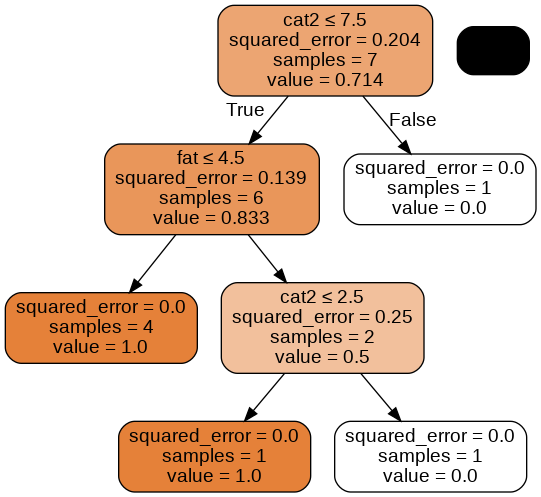

In [59]:
Image(graph.create_png())